In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([5,4,6])
x

tensor([5, 4, 6])

In [3]:
x * x

tensor([25, 16, 36])

In [4]:
M = torch.rand((5))
#(x, y) ---> x is vector of size 5, y is vector of a single value
def f(x):
    return torch.dot(M, x)

# Create data points
data = []
for i in range(100):
    x = torch.rand(5)
    data.append((x, f(x)))
    
# Display M
M

tensor([0.6019, 0.1697, 0.0136, 0.7087, 0.1740])

In [5]:
M_guess = torch.nn.Parameter(torch.rand(5), requires_grad=True)
M_guess

Parameter containing:
tensor([0.3209, 0.0150, 0.8850, 0.6635, 0.3823], requires_grad=True)

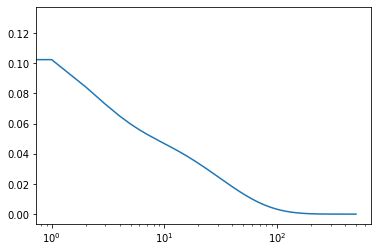

In [6]:
lr = 0.001
time_series = []
for epoch in range(500):
    errors = []
    for inp, actual_val in data:
        pred_val = torch.dot(M_guess, inp)
        error = (pred_val - actual_val)**2
        errors.append(error.item())
        error.backward()

        M_guess.data = M_guess.data - lr * M_guess.grad
        M_guess.grad.zero_()
    time_series.append(sum(errors)/len(errors))
plt.plot(time_series)
plt.xscale("log")

In [7]:
Q = torch.rand(10, 5)
def g(x):
    # x is a 5 length tensor
    return torch.linalg.norm(torch.matmul(Q, x))**2 #  ||Q * x||^2

# Create data points
data = []
for i in range(100):
    x = torch.rand(5)
    data.append((x, g(x) + 0.05 * torch.randn(1))) # New function with noise

In [8]:
class Predictor(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(5, 1)
        self.layer2 = torch.nn.Linear(1, 1)
    def forward(self, x):
        y = self.layer1(x)
        y = torch.relu(y)
        return self.layer2(y)

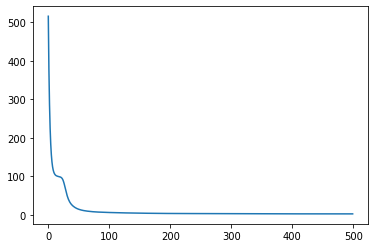

In [9]:
# Manual optimization

lr = 0.001
time_series = []
guess = Predictor()
for epoch in range(500):
    errors = []
    for inp, actual_val in data:
        pred_val = guess(inp)
        error = (pred_val - actual_val)**2
        errors.append(error.item())
        error.backward()
        for param in guess.parameters():
            param.data = param.data - lr * param.grad
            param.grad.zero_()
    time_series.append(sum(errors)/len(errors))
plt.plot(time_series)

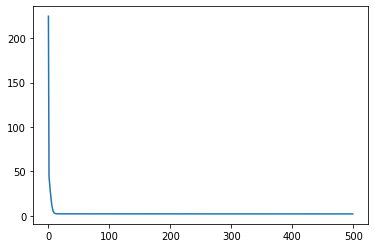

In [11]:
# With optimizer

lr = 0.001
time_series = []
guess = Predictor()
opt = torch.optim.SGD(guess.parameters(), lr=lr)
for epoch in range(500):
    errors = []
    for inp, actual_val in data:
        opt.zero_grad()
        pred_val = guess(inp)
        error = (pred_val - actual_val)**2
        errors.append(error.item())
        error.backward()
        opt.step()
        
    time_series.append(sum(errors)/len(errors))
plt.plot(time_series)